# Maximum Likelihood Estimation (MLE)
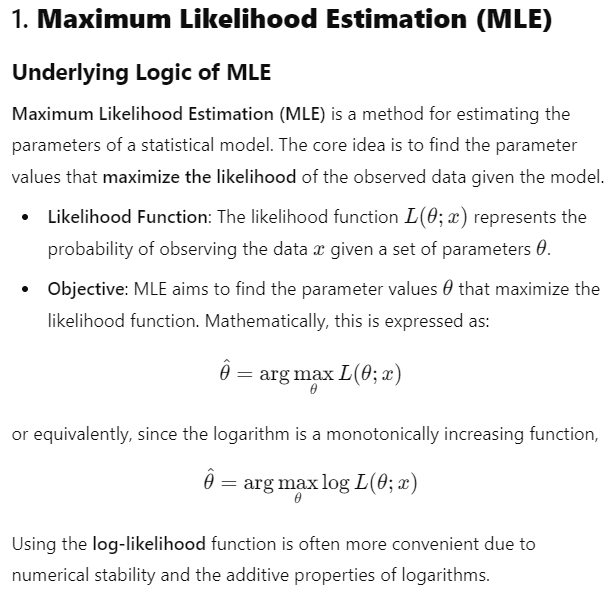
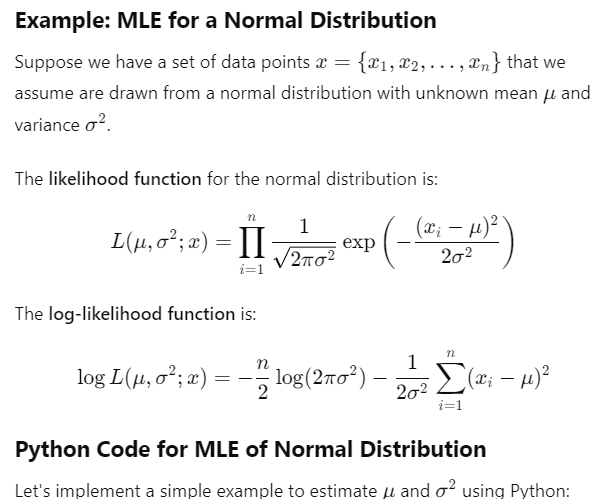

In [1]:
import numpy as np
from scipy.optimize import minimize

# Sample data points
data = np.array([2.1, 2.5, 3.3, 2.8, 3.0, 3.2, 2.7])

# Log-likelihood function for Normal distribution
def log_likelihood_normal(params, data):
    mu, sigma = params
    n = len(data)
    log_likelihood = -n/2 * np.log(2 * np.pi * sigma**2) - np.sum((data - mu)**2) / (2 * sigma**2)
    return -log_likelihood  # Negative log-likelihood for minimization

# Initial guess for mu and sigma
initial_guess = [np.mean(data), np.std(data)]

# Minimize the negative log-likelihood
result = minimize(log_likelihood_normal, initial_guess, args=(data,), bounds=[(None, None), (1e-5, None)])

# Optimal parameters
mu_mle, sigma_mle = result.x

print(f"MLE estimate for mu: {mu_mle:.2f}")
print(f"MLE estimate for sigma: {sigma_mle:.2f}")


MLE estimate for mu: 2.80
MLE estimate for sigma: 0.39


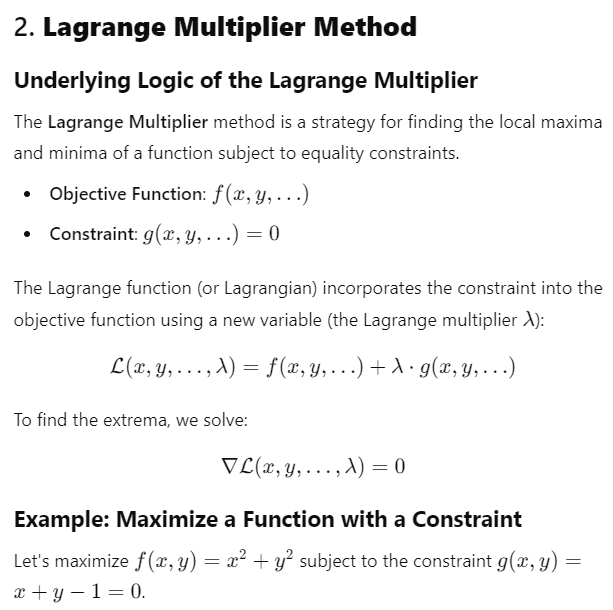
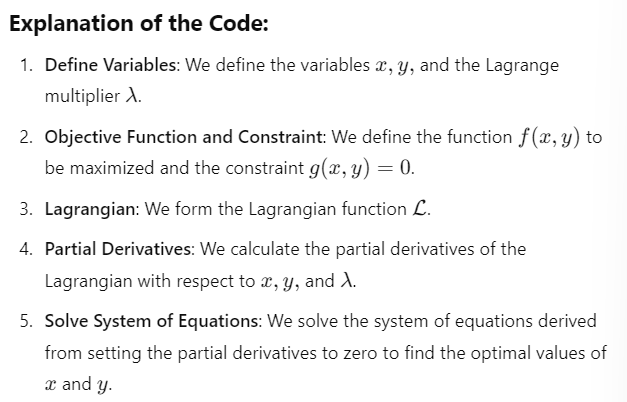

In [2]:
from sympy import symbols, diff, solve, Eq

# Define the variables
x, y, lambd = symbols('x y lambd')

# Objective function
f = x**2 + y**2

# Constraint
g = x + y - 1

# Lagrangian
L = f + lambd * g

# Calculate partial derivatives
L_x = diff(L, x)
L_y = diff(L, y)
L_lambda = diff(L, lambd)

# Solve the system of equations
solutions = solve((L_x, L_y, L_lambda), (x, y, lambd))

print(f"Optimal solution: x = {solutions[x]}, y = {solutions[y]}")


Optimal solution: x = 1/2, y = 1/2


# Extended Kalman Filter (EKF)
- advanced version of the Kalman Filter designed to handle nonlinear systems. The EKF is commonly used in various fields, such as finance, robotics, and signal processing, to estimate the state of a system when the relationship between the state and observations is nonlinear.
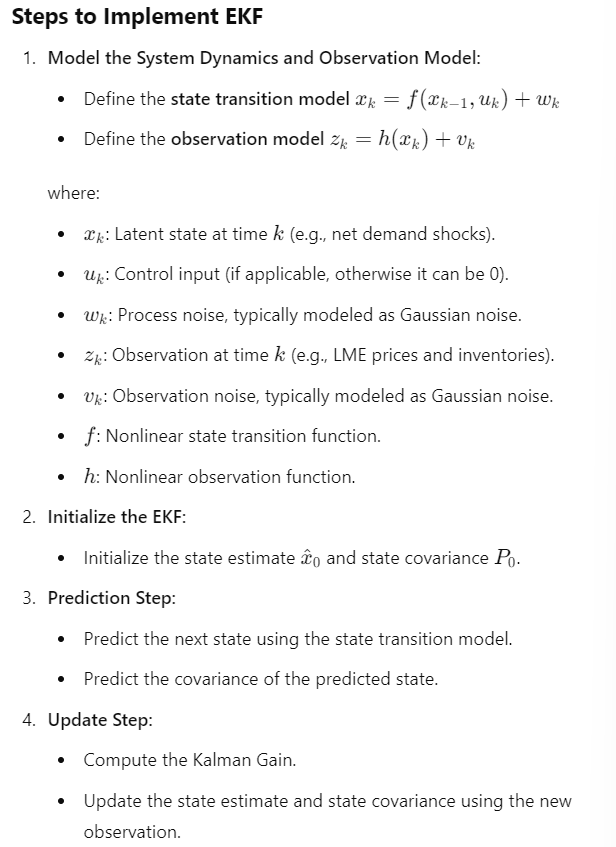
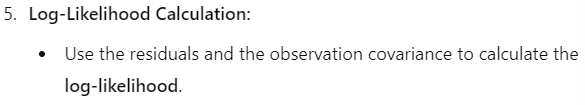
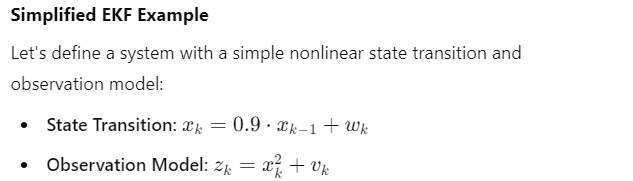

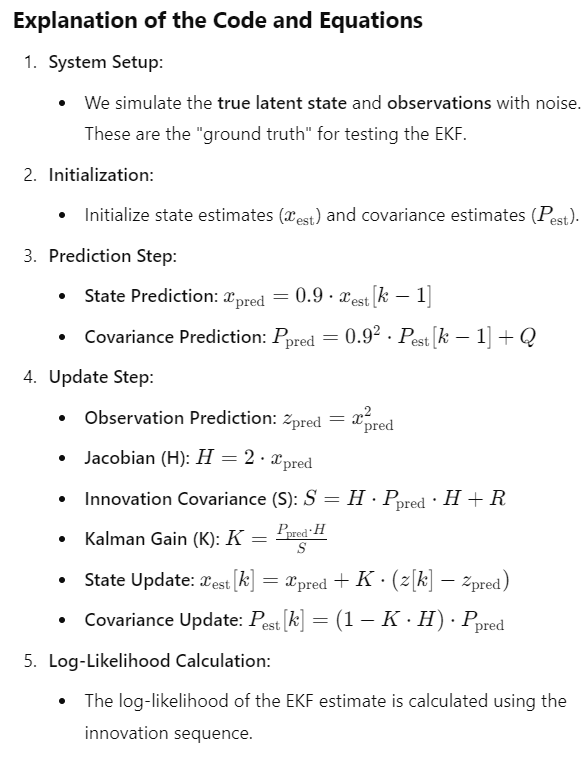

Estimated final state: 0.0002
Log-likelihood of the EKF estimate: 13.2754


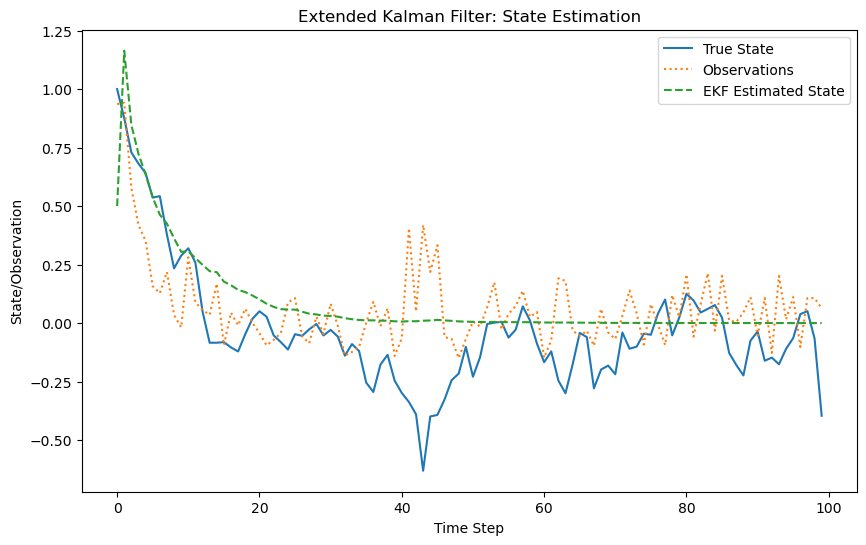

In [3]:
import numpy as np

# Number of time steps
n_steps = 100

# Simulated true latent state (for testing purposes)
true_state = np.zeros(n_steps)
true_state[0] = 1  # Initial true state
for k in range(1, n_steps):
    true_state[k] = 0.9 * true_state[k-1] + np.random.normal(0, 0.1)  # Simulated process noise

# Simulated observations with some noise
observations = true_state**2 + np.random.normal(0, 0.1, n_steps)  # Simulated observation noise

# EKF Initialization
x_est = np.zeros(n_steps)  # State estimates
P_est = np.zeros(n_steps)  # Covariance estimates
x_est[0] = 0.5  # Initial estimate
P_est[0] = 1  # Initial covariance estimate

# Process and observation noise variances
Q = 0.01  # Process noise variance
R = 0.1   # Observation noise variance

# Extended Kalman Filter Algorithm
for k in range(1, n_steps):
    # **Prediction Step**
    # State prediction
    x_pred = 0.9 * x_est[k-1]
    
    # Covariance prediction
    P_pred = 0.9**2 * P_est[k-1] + Q

    # **Update Step**
    # Observation prediction
    z_pred = x_pred**2
    
    # Jacobian of observation model with respect to the state
    H = 2 * x_pred
    
    # Innovation (residual) covariance
    S = H * P_pred * H + R
    
    # Kalman Gain
    K = P_pred * H / S
    
    # State update
    x_est[k] = x_pred + K * (observations[k] - z_pred)
    
    # Covariance update
    P_est[k] = (1 - K * H) * P_pred

# Calculate the log-likelihood based on the innovation sequence
log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * S) + (observations - x_est**2)**2 / S)

print(f"Estimated final state: {x_est[-1]:.4f}")
print(f"Log-likelihood of the EKF estimate: {log_likelihood:.4f}")

# Plotting results (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(true_state, label='True State')
plt.plot(observations, label='Observations', linestyle='dotted')
plt.plot(x_est, label='EKF Estimated State', linestyle='dashed')
plt.legend()
plt.title('Extended Kalman Filter: State Estimation')
plt.xlabel('Time Step')
plt.ylabel('State/Observation')
plt.show()


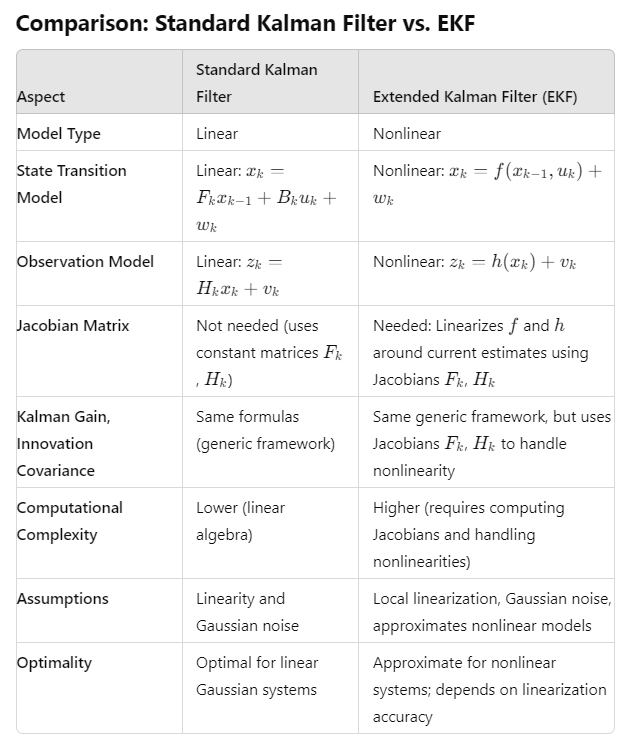

# Extended Kalman Filter (EKF)
- The problem you're working on involves applying the Extended Kalman Filter (EKF) to estimate latent (unobserved) economic processes (like demand shocks) using observable data (such as prices and inventories). The main challenge here is that the relationship between the latent state variables (which represent economic conditions or shocks) and the observable data is nonlinear
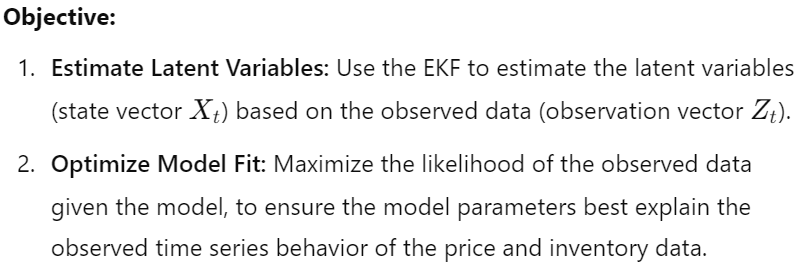
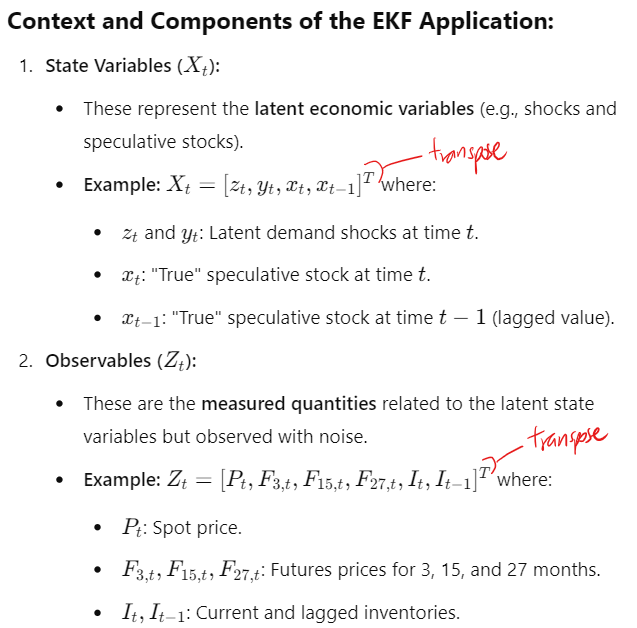
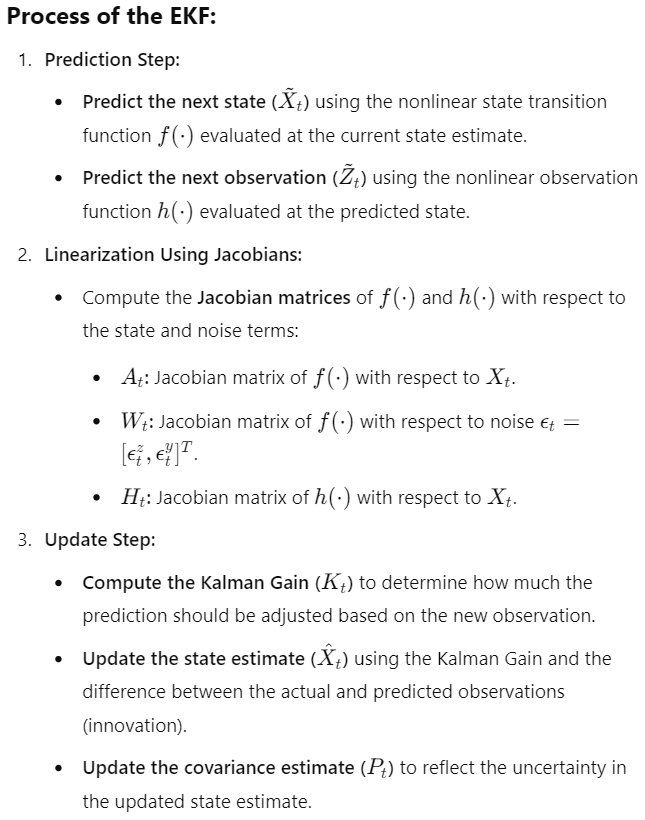

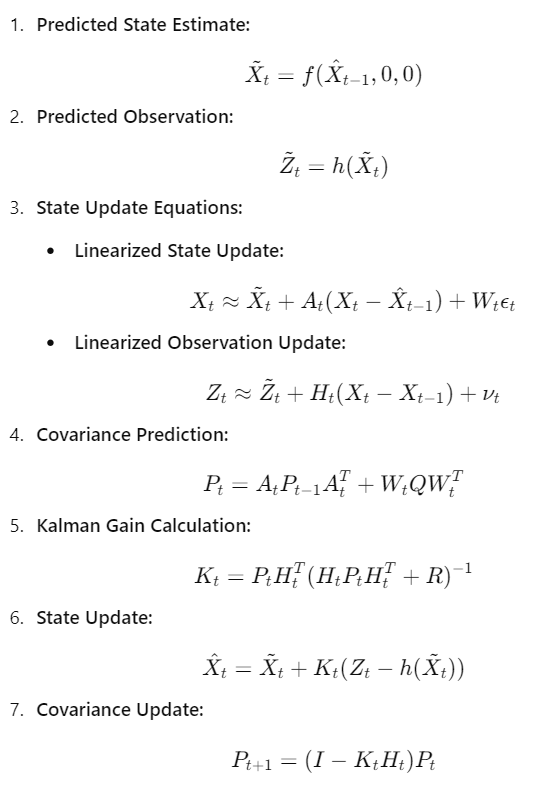
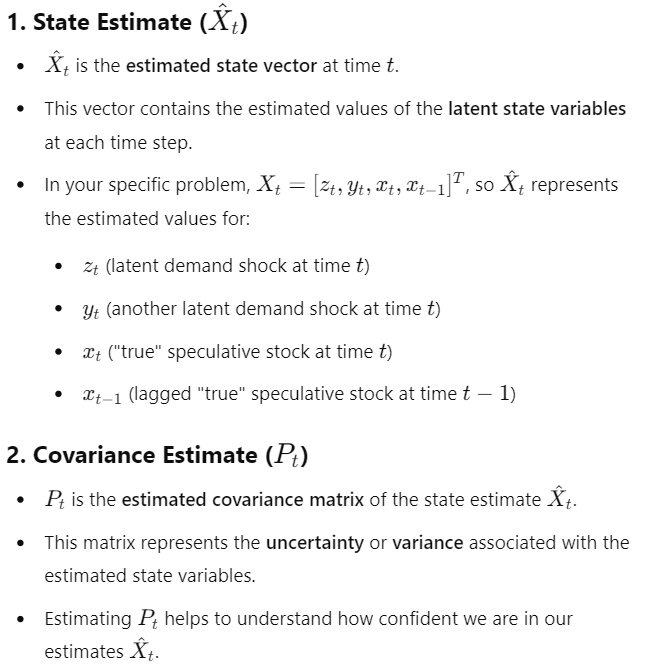

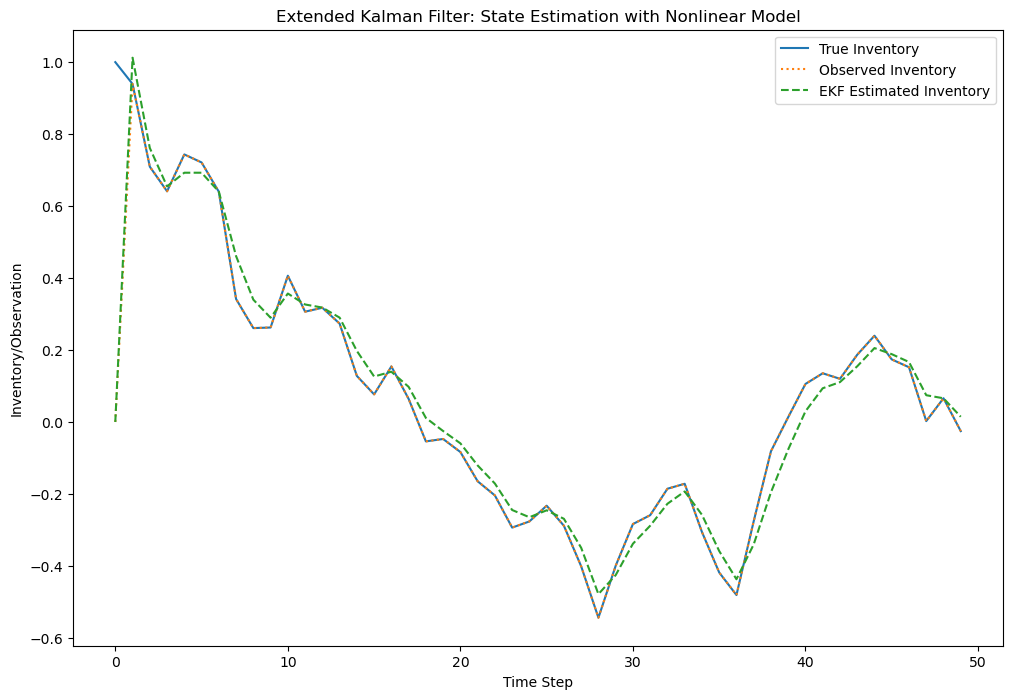

In [11]:
import numpy as np

# Parameters
rho_z = np.exp(-0.1 / 365)  # Example parameter for state z
rho_y = np.exp(-0.05 / 365)  # Example parameter for state y
Q = np.array([[0.01, 0], [0, 0.01]])  # Process noise covariance (2x2)
R = np.array([[0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1]])  # Measurement noise covariance (6x6)
# Number of time steps
n_steps = 50

# Initialize state vectors
X_est = np.zeros((n_steps, 4))  # Estimated state (n_steps x 4)
X_true = np.zeros((n_steps, 4))  # True state (n_steps x 4)
P_est = np.zeros((n_steps, 4, 4))  # Estimated covariance (n_steps x 4 x 4)
P_est[0] = np.eye(4)  # Initial covariance estimate (4x4)

# Simulate true state
np.random.seed(0)
X_true[0] = [0, 0, 1, 1]  # Initial true state
observations = np.zeros((n_steps, 6))  # Observed data (n_steps x 6)

for t in range(1, n_steps):
    # True state evolution
    z_t = rho_z * X_true[t-1, 0] + np.random.normal(0, np.sqrt(Q[0, 0]))
    y_t = rho_y * X_true[t-1, 1] + np.random.normal(0, np.sqrt(Q[1, 1]))
    x_t = np.sin(X_true[t-1, 2]) + np.random.normal(0, 0.1)
    x_t_minus1 = X_true[t-1, 2]

    X_true[t] = [z_t, y_t, x_t, x_t_minus1]
    
    # Observation model (nonlinear)
    P_t = X_true[t, 2]  # Simplified spot price example
    F3_t = X_true[t, 2] ** 2  # Futures price example
    F15_t = np.log1p(X_true[t, 2])  # Log example
    F27_t = np.exp(X_true[t, 2])  # Exponential example
    I_t = X_true[t, 2]  # Inventory
    I_t_minus1 = X_true[t, 3]  # Lagged inventory
    
    observations[t] = [P_t, F3_t, F15_t, F27_t, I_t, I_t_minus1]

# EKF Algorithm
for t in range(1, n_steps):
    # **Prediction Step**
    X_pred = np.array([
        rho_z * X_est[t-1, 0], 
        rho_y * X_est[t-1, 1], 
        np.sin(X_est[t-1, 2]), 
        X_est[t-1, 2]
    ])
    
    # Jacobians (linearized matrices)
    A_t = np.array([
        [rho_z, 0, 0, 0],
        [0, rho_y, 0, 0],
        [np.cos(X_est[t-1, 2]), np.cos(X_est[t-1, 3]), 0, 0],
        [0, 0, 1, 0]
    ])
    
    W_t = np.array([
        [1, 0],
        [0, 1],
        [np.cos(X_est[t-1, 2]), 0],
        [0, 0]
    ])  # Corrected to match dimensions (4x2)
    
    # Covariance prediction
    P_pred = A_t @ P_est[t-1] @ A_t.T + W_t @ Q @ W_t.T
    
    # **Update Step**
    # Observation prediction
    Z_pred = np.array([
        X_pred[2],  # Spot price
        X_pred[2] ** 2,  # Futures price
        np.log1p(X_pred[2]),  # Log example
        np.exp(X_pred[2]),  # Exponential example
        X_pred[2],  # Inventory
        X_pred[3]  # Lagged inventory
    ])
    
    # Jacobian of observation model H_t
    H_t = np.array([
        [0, 0, 1, 0],
        [0, 0, 2 * X_pred[2], 0],
        [0, 0, 1 / (1 + X_pred[2]), 0],
        [0, 0, np.exp(X_pred[2]), 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    
    # Innovation (residual)
    y_t = observations[t] - Z_pred
    
    # Innovation covariance
    S_t = H_t @ P_pred @ H_t.T + R
    
    # Kalman Gain
    K_t = P_pred @ H_t.T @ np.linalg.inv(S_t)
    
    # State update
    X_est[t] = X_pred + K_t @ y_t
    
    # Covariance update
    P_est[t] = (np.eye(4) - K_t @ H_t) @ P_pred

# Plotting results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(X_true[:, 2], label='True Inventory')
plt.plot(observations[:, 4], label='Observed Inventory', linestyle='dotted')
plt.plot(X_est[:, 2], label='EKF Estimated Inventory', linestyle='dashed')
plt.legend()
plt.title('Extended Kalman Filter: State Estimation with Nonlinear Model')
plt.xlabel('Time Step')
plt.ylabel('Inventory/Observation')
plt.show()


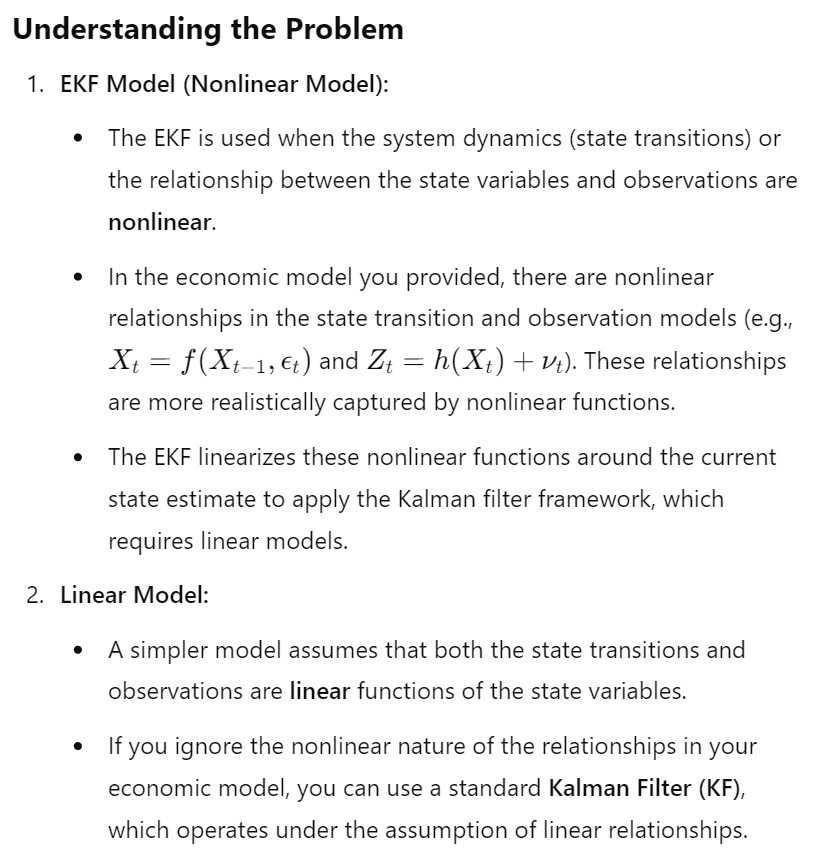
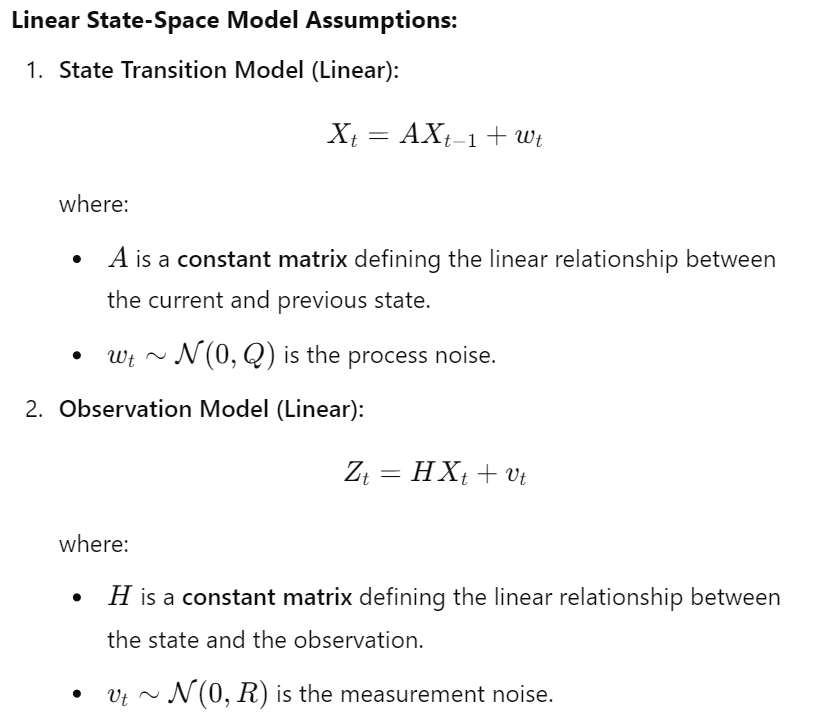
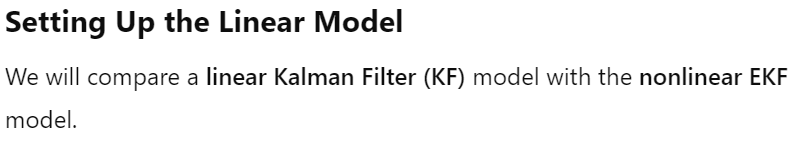

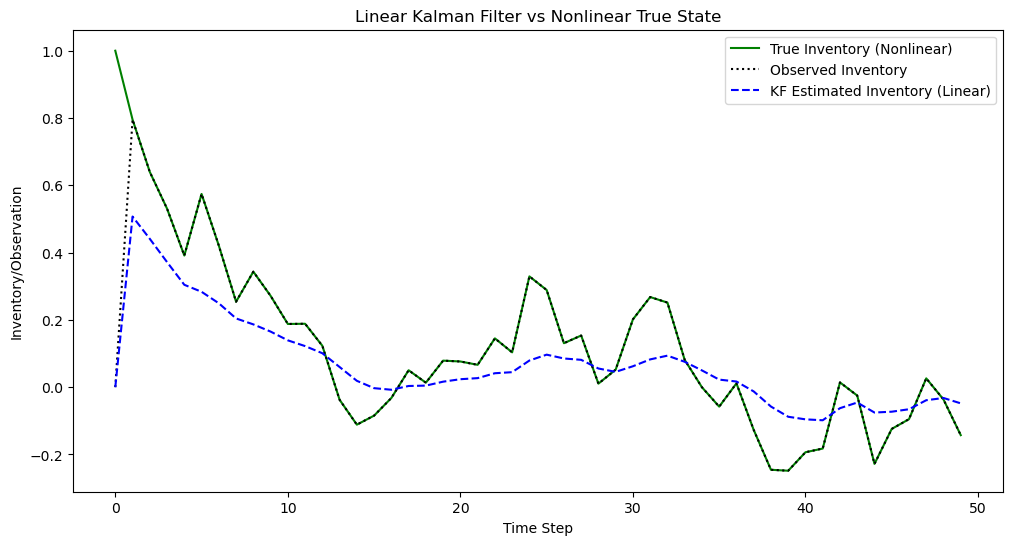

In [6]:
import numpy as np

# Linear model parameters
A = np.array([[0.9, 0, 0, 0],  # Example state transition matrix
              [0, 0.95, 0, 0],
              [0, 0, 0.8, 0],
              [0, 0, 0, 1]])
H = np.array([[1, 0, 0, 0],    # Example observation matrix
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1],
              [0, 0, 0, 1],
              [0, 0, 0, 1]])

Q = np.diag([0.01, 0.01, 0.01, 0.01])  # Process noise covariance (4x4)
R = np.diag([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Measurement noise covariance (6x6)

# Number of time steps
n_steps = 50

# Initialize state vectors for linear model
X_est_lin = np.zeros((n_steps, 4))  # Estimated state (n_steps x 4)
P_est_lin = np.zeros((n_steps, 4, 4))  # Estimated covariance (n_steps x 4 x 4)
P_est_lin[0] = np.eye(4)  # Initial covariance estimate (4x4)

# Simulate true state (same as for EKF)
X_true = np.zeros((n_steps, 4))
X_true[0] = [0, 0, 1, 1]  # Initial true state

observations = np.zeros((n_steps, 6))

for t in range(1, n_steps):
    # True state evolution (for both linear and nonlinear models)
    z_t = rho_z * X_true[t-1, 0] + np.random.normal(0, np.sqrt(Q[0, 0]))
    y_t = rho_y * X_true[t-1, 1] + np.random.normal(0, np.sqrt(Q[1, 1]))
    x_t = np.sin(X_true[t-1, 2]) + np.random.normal(0, 0.1)
    x_t_minus1 = X_true[t-1, 2]

    X_true[t] = [z_t, y_t, x_t, x_t_minus1]
    
    # Observation model (linear for KF, nonlinear for EKF)
    P_t = X_true[t, 2]
    F3_t = X_true[t, 2] ** 2
    F15_t = np.log1p(X_true[t, 2])
    F27_t = np.exp(X_true[t, 2])
    I_t = X_true[t, 2]
    I_t_minus1 = X_true[t, 3]
    
    observations[t] = [P_t, F3_t, F15_t, F27_t, I_t, I_t_minus1]

# Linear Kalman Filter Algorithm
for t in range(1, n_steps):
    # Prediction Step
    X_pred = A @ X_est_lin[t-1]
    P_pred = A @ P_est_lin[t-1] @ A.T + Q
    
    # Update Step
    Z_pred = H @ X_pred
    y_t = observations[t] - Z_pred
    S_t = H @ P_pred @ H.T + R
    K_t = P_pred @ H.T @ np.linalg.inv(S_t)
    
    X_est_lin[t] = X_pred + K_t @ y_t
    P_est_lin[t] = (np.eye(4) - K_t @ H) @ P_pred

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(X_true[:, 2], label='True Inventory (Nonlinear)', color='green')
plt.plot(observations[:, 4], label='Observed Inventory', linestyle='dotted', color='black')
plt.plot(X_est_lin[:, 2], label='KF Estimated Inventory (Linear)', linestyle='dashed', color='blue')
plt.legend()
plt.title('Linear Kalman Filter vs Nonlinear True State')
plt.xlabel('Time Step')
plt.ylabel('Inventory/Observation')
plt.show()


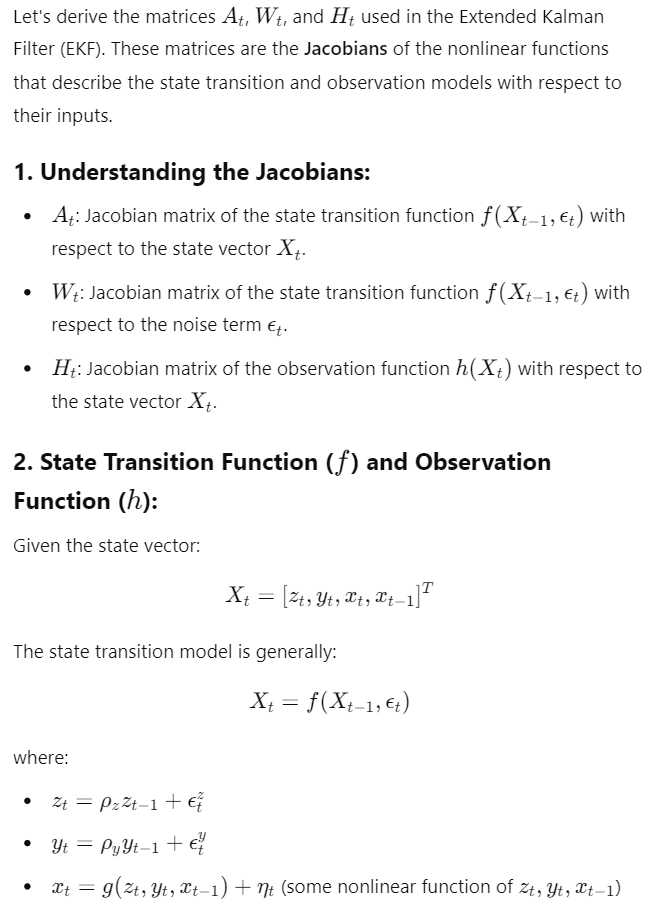
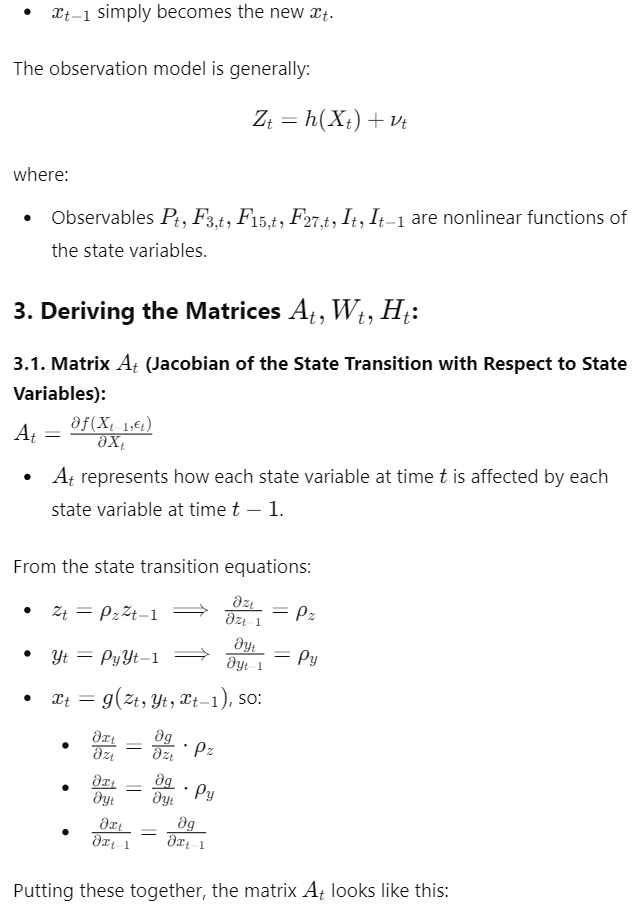
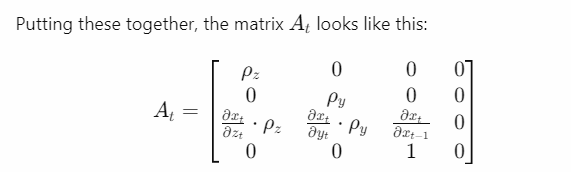
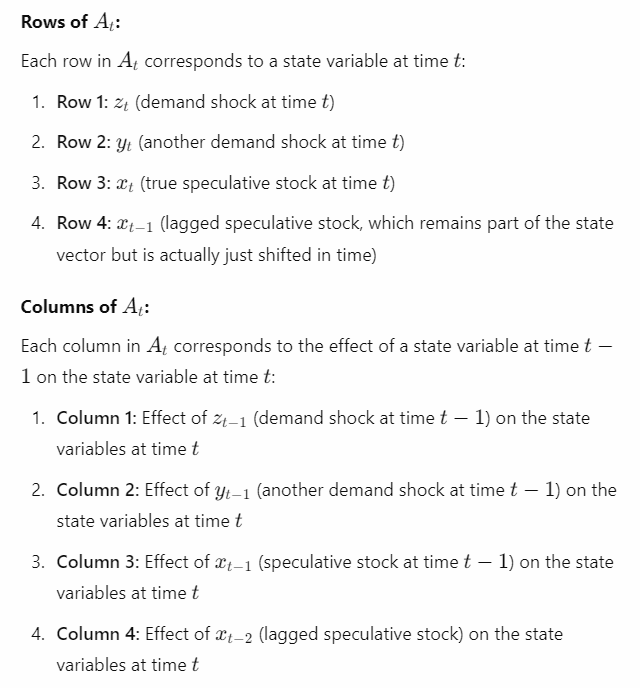
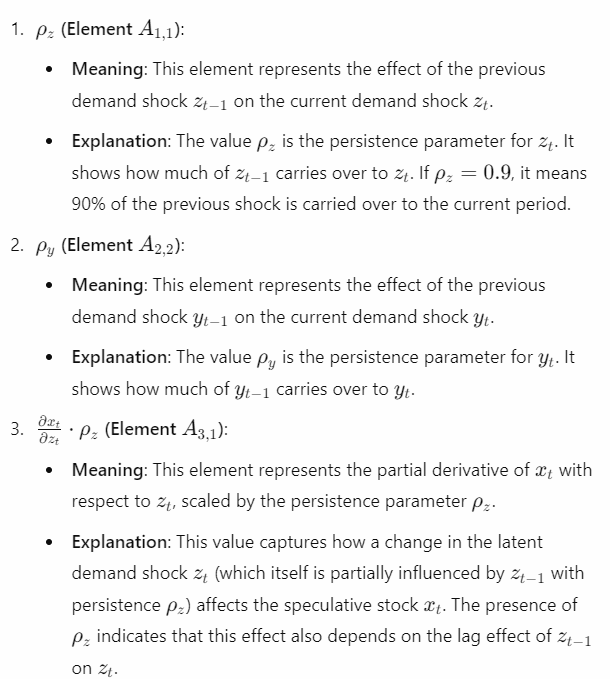
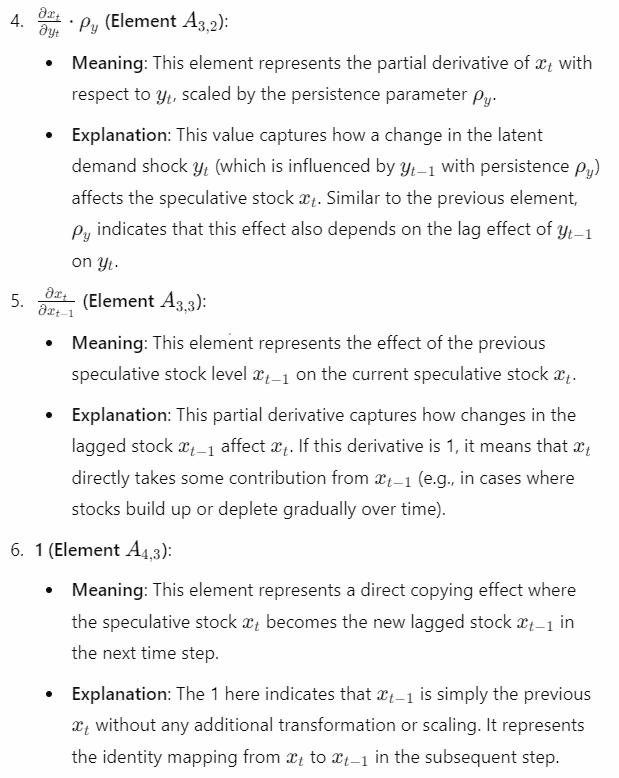
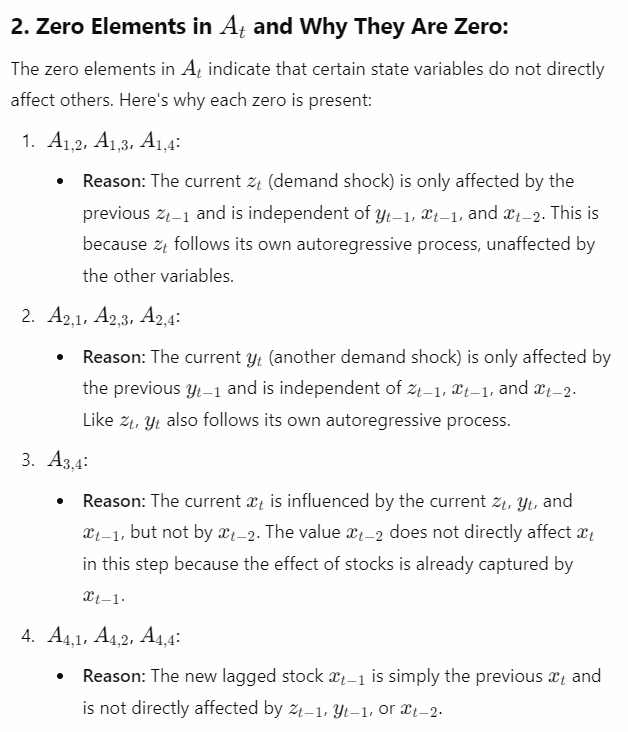

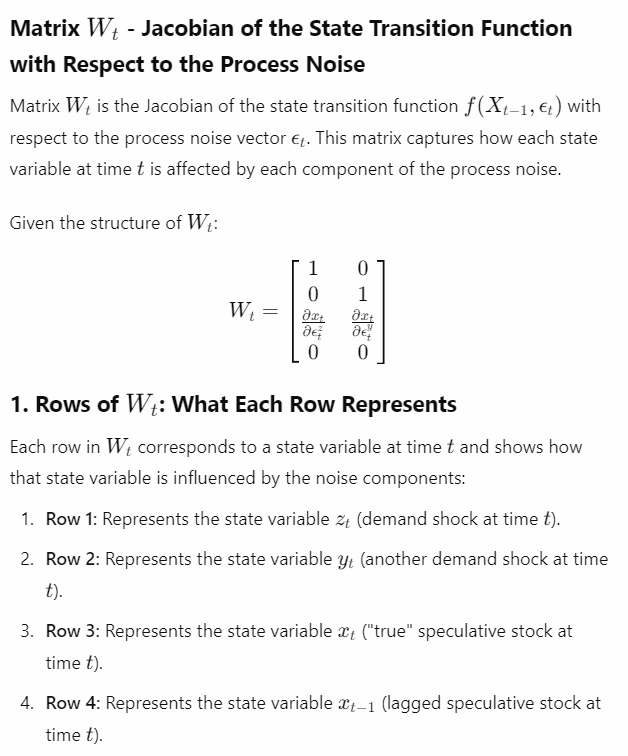
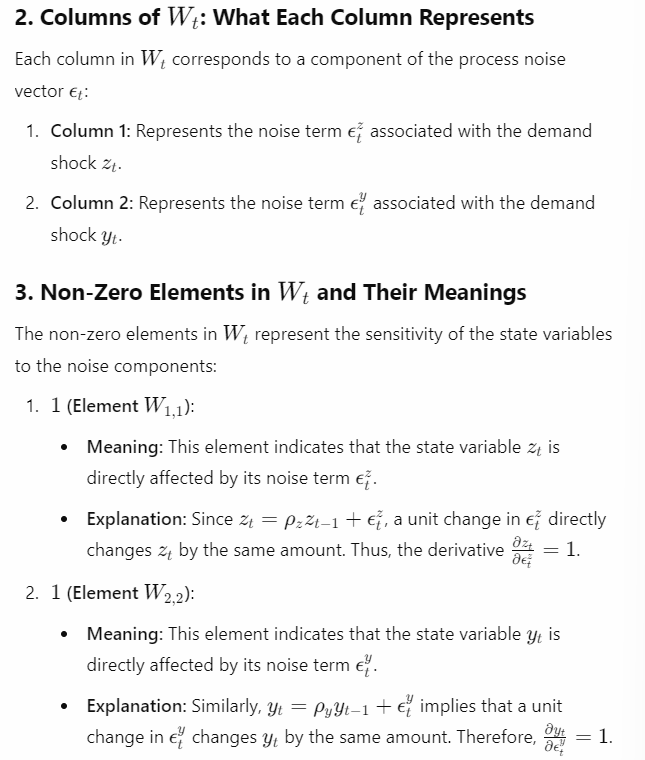

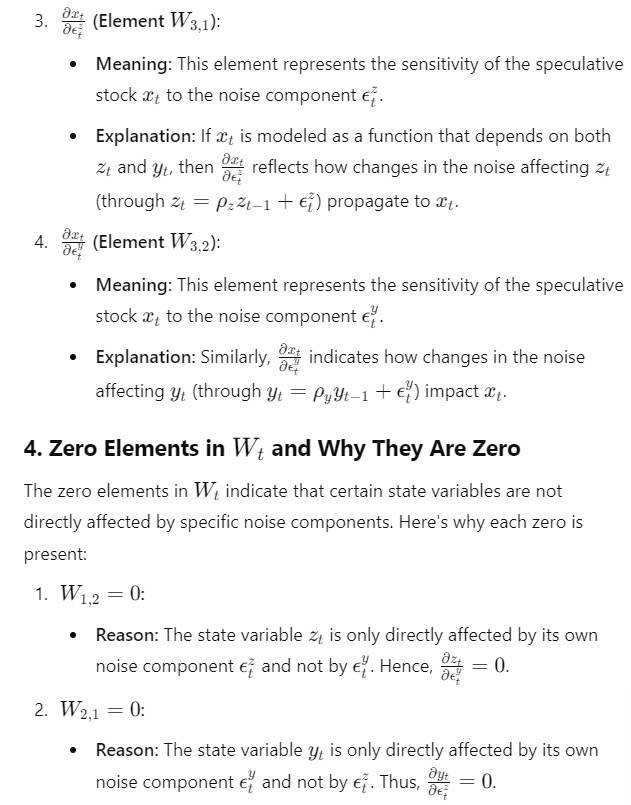
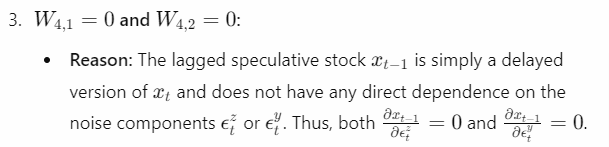
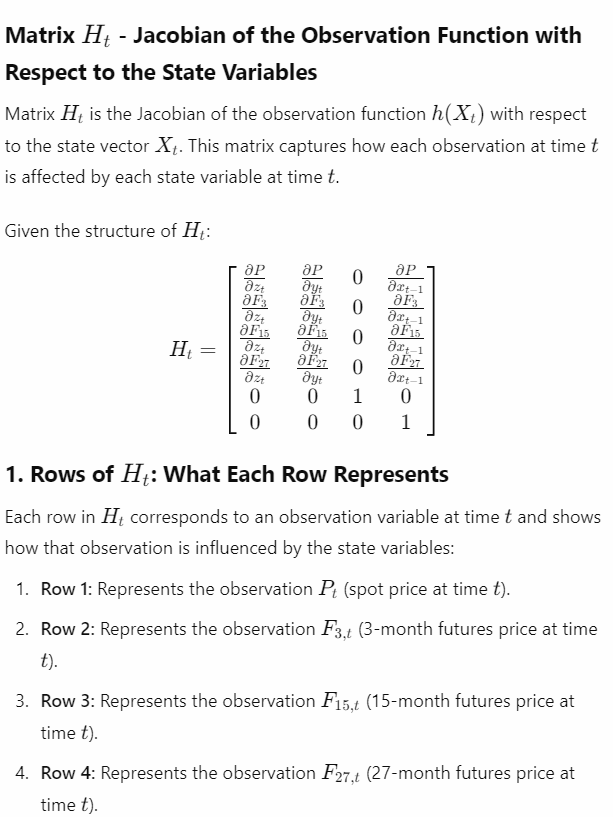
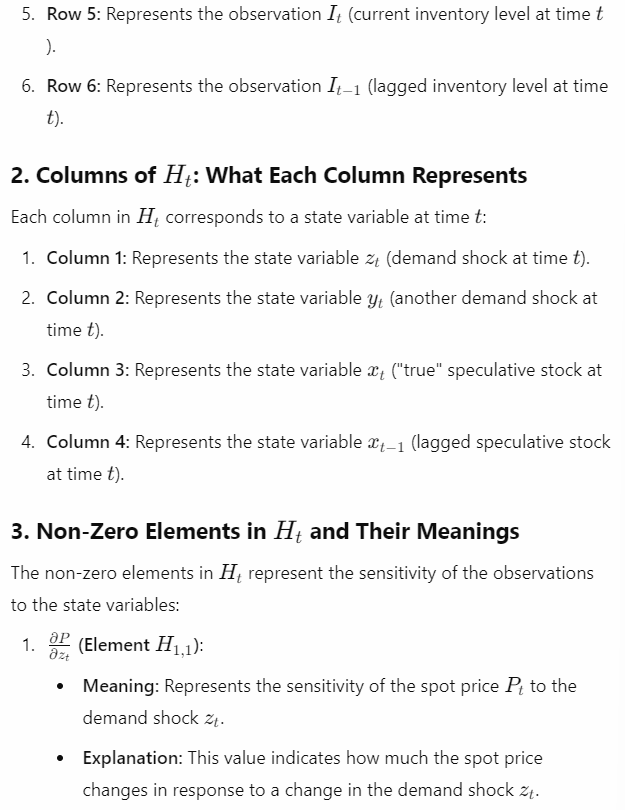
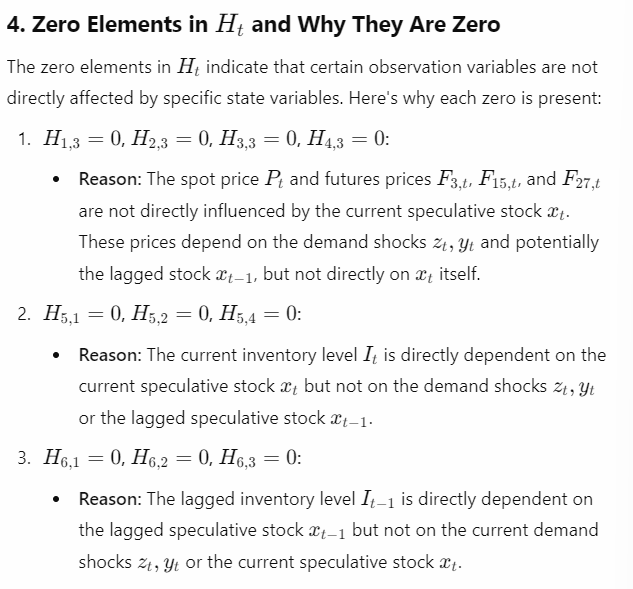

# Stochastics Underlying Prices to Value Futures/Fowards/Options
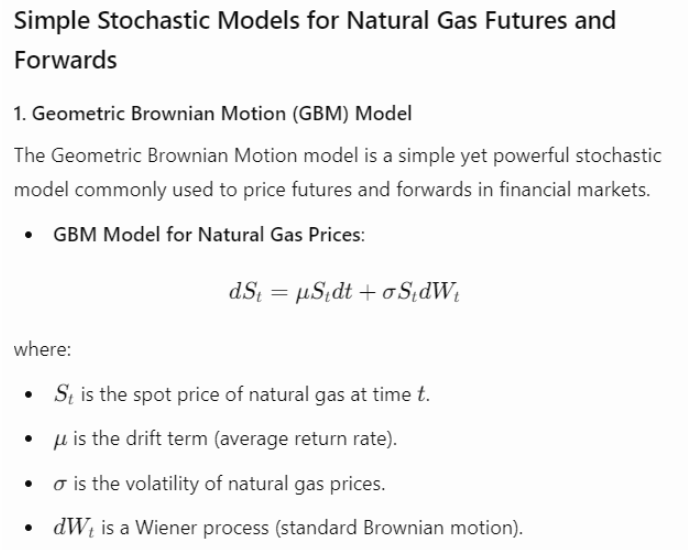
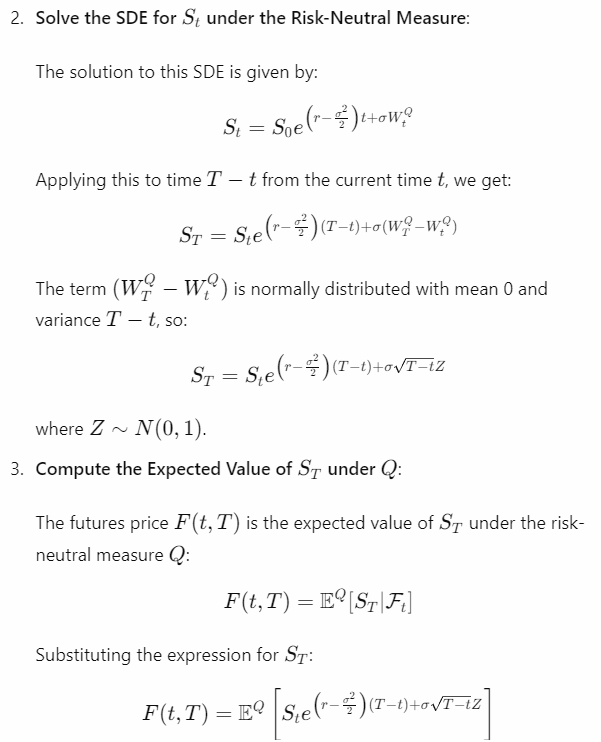
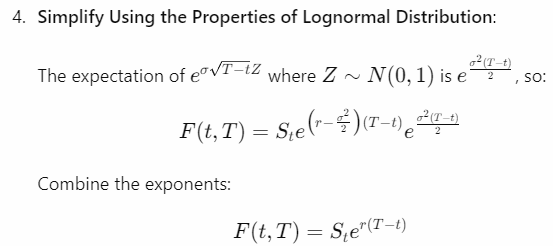
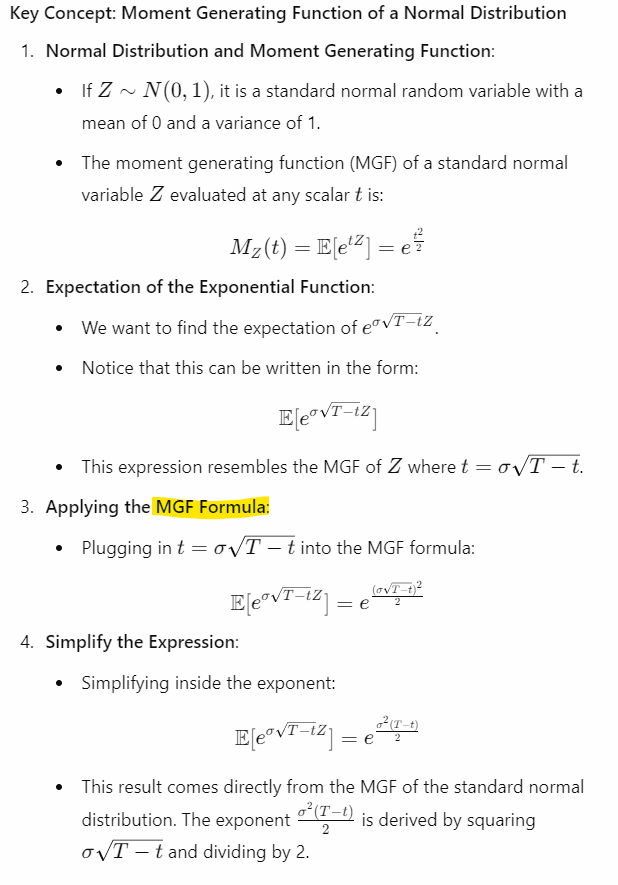
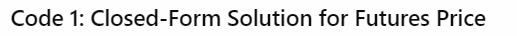
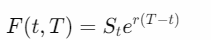

In [7]:
import numpy as np

# Parameters for the futures pricing
S0 = 100  # Current spot price of the underlying asset
r = 0.05  # Risk-free interest rate
T = 1     # Time to maturity (1 year)
t = 0     # Current time

# Closed-form solution for futures price
futures_price_closed_form = S0 * np.exp(r * (T - t))
print(f"Futures Price using Closed-Form Solution: {futures_price_closed_form:.2f}")


Futures Price using Closed-Form Solution: 105.13


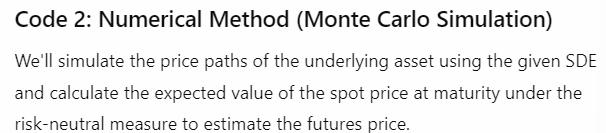
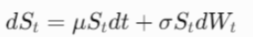
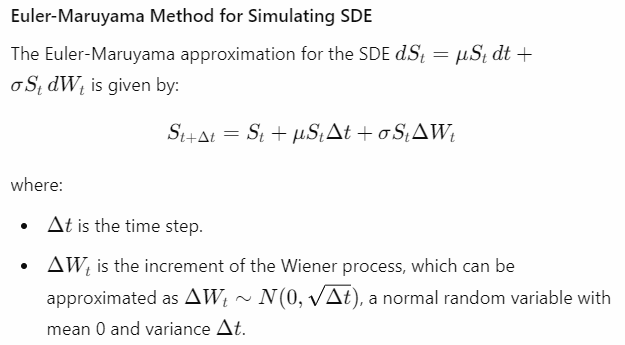

In [25]:
import numpy as np

# Parameters for the Monte Carlo simulation
mu = 0.05   # Drift (not used under risk-neutral measure, replaced by r)
sigma = 0.2 # Volatility
dt = 1/252  # Time step (daily)

M = 10000   # Number of simulations

T = 1       # Time to maturity (1 year)
N = int(T/dt)  # Number of time steps

# Initializing the array to store simulated price paths
S = np.zeros((M, N))
S[:, 0] = 100  # Set the initial price

# Simulate the price paths using the Euler-Maruyama method
for t in range(1, N): 
#     if t <= 3:
#         display(S[-1][:5])
    dW = np.random.normal(0, np.sqrt(dt), M)  # M num of diff Wiener process increments
    S[:, t] = S[:, t-1] + mu * S[:, t-1] * dt + sigma * S[:, t-1] * dW

# Estimate futures price as the average of simulated spot prices at maturity
futures_price_numerical = np.mean(S[:, -1]) # average final S for all simulations
print(f"Futures Price using Numerical Method (Euler-Maruyama): {futures_price_numerical:.2f}")


Futures Price using Numerical Method (Euler-Maruyama): 105.06


In [14]:
import numpy as np

# Parameters for the Monte Carlo simulation
mu = 0.05   # Drift (not used under risk-neutral measure, replaced by r)
sigma = 0.2 # Volatility
dt = 1/252  # Time step (daily)

M = 10000   # Number of simulations

T = 1       # Time to maturity (1 year)
N = int(T/dt)  # Number of time steps

# Initializing the array to store simulated price paths
S = np.zeros((M, N))
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Options
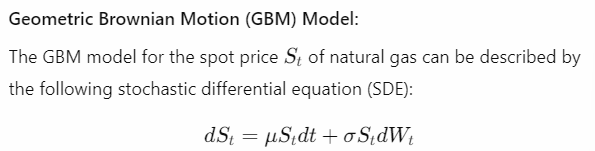
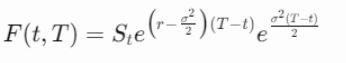
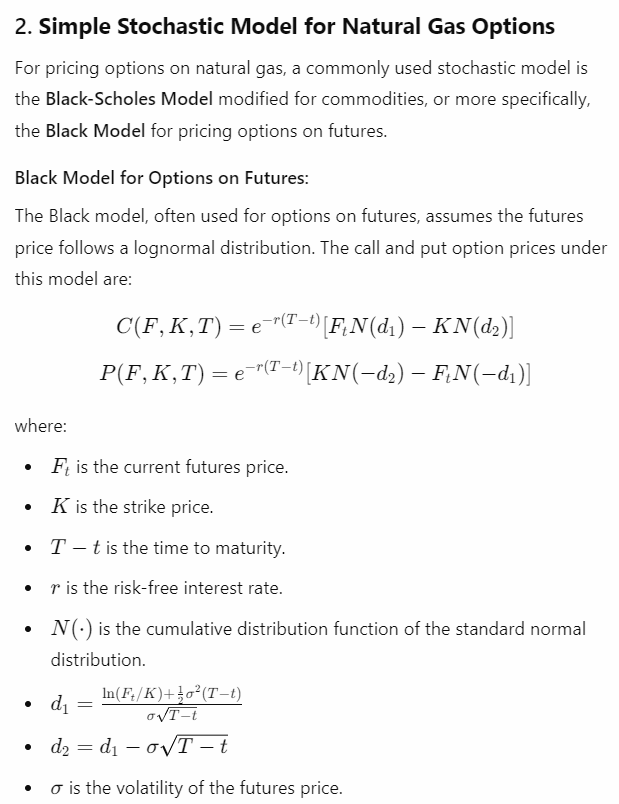

In [26]:
import numpy as np
from scipy.stats import norm

# Model parameters
F_t = 3.0  # Current futures price (example value)
K = 3.2    # Strike price (example value)
T = 1.0    # Time to maturity in years
r = 0.05   # Risk-free interest rate
sigma = 0.3  # Volatility of futures price

# Black model formula components
d1 = (np.log(F_t / K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Call and put option prices
call_price = np.exp(-r * T) * (F_t * norm.cdf(d1) - K * norm.cdf(d2))
put_price = np.exp(-r * T) * (K * norm.cdf(-d2) - F_t * norm.cdf(-d1))

print(f"Call option price: {call_price:.4f}")
print(f"Put option price: {put_price:.4f}")


Call option price: 0.2645
Put option price: 0.4548


# Euler-Maruyama Method to simulate futures prices, then calc call/put price

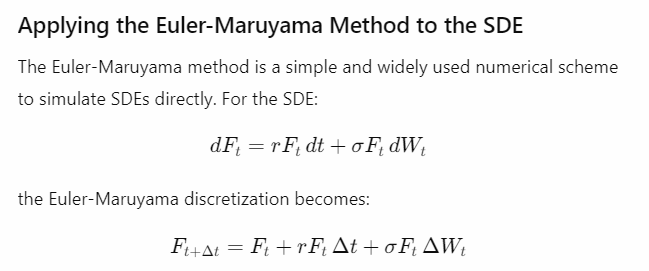
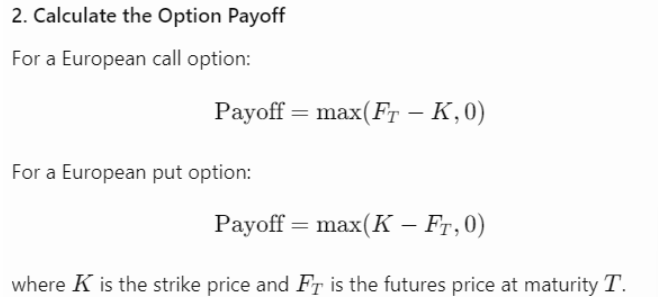

In [41]:
import numpy as np

# Parameters
F0 = 100  # Initial futures price
K = 105   # Strike price of the option
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of futures price
T = 1     # Time to maturity (1 year)
dt = 1/252  # Time step (daily)
N = int(T/dt)  # Number of time steps
M = 10000  # Number of simulations

# Initialize array to store simulated futures price paths
F = np.zeros((M, N))
F[:, 0] = F0  # Set initial futures price

# Simulate futures price paths using Euler-Maruyama method
for t in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt), M)  # Brownian motion increments
    F[:, t] = F[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * dW)

# Calculate the payoff for a European call option for each path
call_payoffs = np.maximum(F[:, -1] - K, 0)

# Calculate the payoff for a European put option for each path
put_payoffs = np.maximum(K - F[:, -1], 0)

# Discount the average payoff back to the present value
call_price_numerical = np.exp(-r * T) * np.mean(call_payoffs)
put_price_numerical = np.exp(-r * T) * np.mean(put_payoffs)

print(f"Call Option Price using Numerical Method (Monte Carlo): {call_price_numerical:.2f}")
print(f"Put Option Price using Numerical Method (Monte Carlo): {put_price_numerical:.2f}")


Call Option Price using Numerical Method (Monte Carlo): 7.90
Put Option Price using Numerical Method (Monte Carlo): 7.95
